In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data_path = 'cifake dataset/train'
test_data_path = 'cifake dataset/test'

# Create empty lists to store image data and labels
data = []
labels = []

# Loop through the REAL and FAKE subfolders in the train data directory
for folder in os.listdir(train_data_path):
    folder_path = os.path.join(train_data_path, folder)
    label = folder  # Label is either 'REAL' or 'FAKE'

    # Loop through the images in each subfolder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))  # we are given 32*32 images but created check for consistency
        data.append(image)
        labels.append(label)

In [3]:
# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [4]:
# Create a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)

# Train the classifier on the training data
lr_classifier.fit(X_train.reshape(-1, 32*32*3), y_train)
print("Model Trained")

# Make predictions on the validation data
val_predictions = lr_classifier.predict(X_val.reshape(-1, 32*32*3))

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", validation_accuracy)

c:\Users\paris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Trained
Validation Accuracy: 0.6793


Validation Precision: 0.6638670973696355
Validation Recall: 0.7218263923733066
Validation F1-Score: 0.6916346153846155
Validation Confusion Matrix:
[[6393 3642]
 [2772 7193]]
Validation Specificity: 0.6370702541106129
Validation False Positive Rate: 0.36292974588938715
Validation ROC Curve and AUC-ROC:


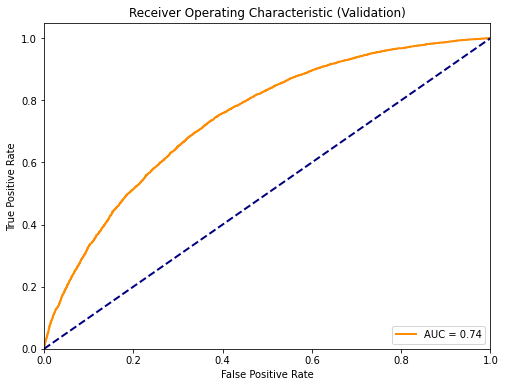

Validation Precision-Recall Curve and AUC-PR:


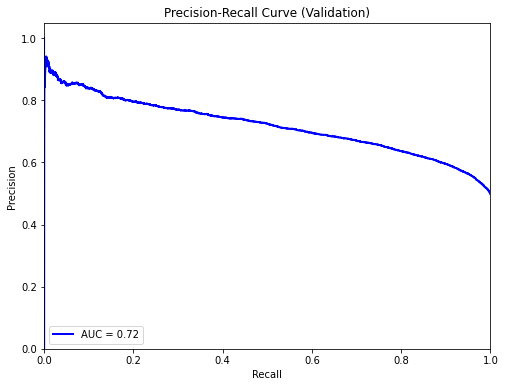

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-Score on the validation data
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1-Score:", f1)

# Calculate the confusion matrix on the validation data
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Validation Confusion Matrix:")
print(conf_matrix)

# Calculate specificity and false positive rate on the validation data
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
fpr = fp / (tn + fp)
print("Validation Specificity:", specificity)
print("Validation False Positive Rate:", fpr)

# Calculate ROC curve and AUC-ROC on the validation data
y_prob = lr_classifier.predict_proba(X_val.reshape(-1, 32*32*3))
fpr, tpr, thresholds = roc_curve(y_val, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print("Validation ROC Curve and AUC-ROC:")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Validation)')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curve and AUC-PR on the validation data
precision, recall, _ = precision_recall_curve(y_val, y_prob[:, 1])
pr_auc = average_precision_score(y_val, y_prob[:, 1])
print("Validation Precision-Recall Curve and AUC-PR:")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Validation)')
plt.legend(loc='lower left')
plt.show()

### TEST DATA

In [5]:
# Load and preprocess the test data
test_data = []
test_labels = []

for folder in os.listdir(test_data_path):
    folder_path = os.path.join(test_data_path, folder)
    label = folder  # Label is either 'REAL' or 'FAKE'

    # Loop through the images in each subfolder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))  # we are given 32*32 images but created check for consistency
        test_data.append(image)
        test_labels.append(label)

In [6]:
# Convert test data to a NumPy array
test_data = np.array(test_data)

# Make predictions on the test data
test_predictions = lr_classifier.predict(test_data.reshape(-1, 32*32*3))
# Map the predicted labels back to 'real' and 'fake'
test_predictions = label_encoder.inverse_transform(test_predictions)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.67725


Test Precision: 0.6926002390524829
Test Recall: 0.6374
Test F1-Score: 0.6638546060511379
Test Specificity: 0.6374
Test False Positive Rate: 0.3626
Test ROC Curve and AUC-ROC:


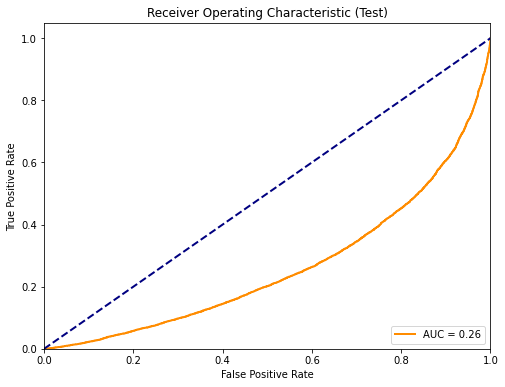

Test Precision-Recall Curve and AUC-PR:


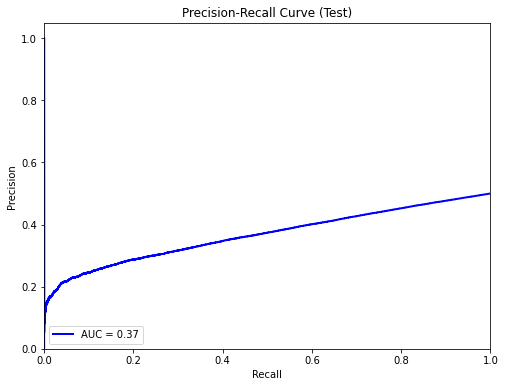

Test Confusion Matrix:
[[6374 3626]
 [2829 7171]]


In [8]:
# Calculate precision, recall, and F1-Score on the test data
test_precision = precision_score(test_labels, test_predictions, pos_label='FAKE')
test_recall = recall_score(test_labels, test_predictions, pos_label='FAKE')
test_f1 = f1_score(test_labels, test_predictions, pos_label='FAKE')
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

# Calculate specificity and false positive rate on the test data
test_conf_matrix = confusion_matrix(test_labels, test_predictions)
test_tn, test_fp, test_fn, test_tp = test_conf_matrix.ravel()
test_specificity = test_tn / (test_tn + test_fp)
test_fpr = test_fp / (test_tn + test_fp)
print("Test Specificity:", test_specificity)
print("Test False Positive Rate:", test_fpr)

# Calculate ROC curve and AUC-ROC on the test data
test_y_prob = lr_classifier.predict_proba(test_data.reshape(-1, 32*32*3))
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, test_y_prob[:, 1], pos_label='FAKE')
test_roc_auc = auc(test_fpr, test_tpr)
print("Test ROC Curve and AUC-ROC:")
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test)')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curve and AUC-PR on the test data
test_precision, test_recall, _ = precision_recall_curve(test_labels, test_y_prob[:, 1], pos_label='FAKE')
test_pr_auc = average_precision_score(test_labels, test_y_prob[:, 1], pos_label='FAKE')
print("Test Precision-Recall Curve and AUC-PR:")
plt.figure(figsize=(8, 6))
plt.plot(test_recall, test_precision, color='blue', lw=2, label=f'AUC = {test_pr_auc:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.legend(loc='lower left')
plt.show()

# Calculate the confusion matrix on the test data
print("Test Confusion Matrix:")
print(test_conf_matrix)